In [30]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\test
input\training


In [31]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [32]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [33]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

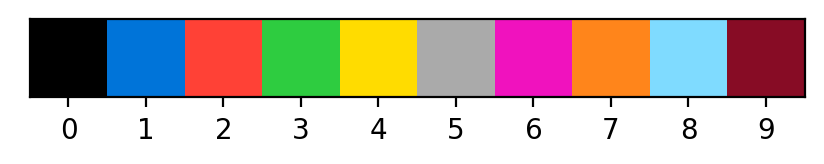

In [91]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [92]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [93]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [94]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

In [95]:
def maxcolor_b(A):
    A=np.array(A)
    b = np.bincount(A.flatten(),minlength=10)

    c=np.argsort(b)[-1]
    return c

In [96]:
a=[0,1,2,2,3,4]
maxcolor_b(a)

2

In [97]:
dict1={}
dict1[(0,1)]=1
dict1

{(0, 1): 1}

In [110]:
BACKGROUND=0
def connect_dot_row_color(a0,b0):
    a=np.array(a0)
    b=np.array(b0)
    a_copy=a.copy()
    dict1={}
    m,n=a.shape
    for i in range(m):
        for j in range(n):
            if a[i][j]==BACKGROUND:
                continue
            else:
                c=a[i][j]
            if j+1<=n-1:
                for k in range(j+1,n):
                    if a[i][k]==c:
                        if j+1!=k:
                            for j2 in range(j+1,k):
                                x_color=a[i,j2]
                                y_color=b[i,j2]
                                
                                
                                
                                if str([0,c,x_color]) not in dict1:
                                    dict1[str([0,c,x_color])]=y_color
                                elif dict1[str([0,c,x_color])]!= y_color:
                                    return -1


                                a_copy[i,j2]=dict1[str([0,c,x_color])]
                        
                        
            if i+1<=m-1:
                for l in range(i+1,m):
                    if a[l][j]==c:
                        if i+1!=l:
                            for i2 in range(i+1,l):
                                x_color=a[i2,j]
                                y_color=b[i2,j]
                            
                                if str([1,c,x_color]) not in dict1:
                                    dict1[str([1,c,x_color])]=y_color
                                elif dict1[str([1,c,x_color])]!= y_color:
                                    return -1
                                a_copy[i2,j]=dict1[str([1,c,x_color])]

    
            
                    
    return a_copy.tolist(),dict1
                
            

In [114]:
BACKGROUND=0
def connect_dot_row_color_use_dict(a0,dict1):
    a=np.array(a0)

    a_copy=a.copy()

    m,n=a.shape
    for i in range(m):
        for j in range(n):
            if a[i][j]==BACKGROUND:
                continue
            else:
                c=a[i][j]
            if j+1<=n-1:
                for k in range(j+1,n):
                    if a[i][k]==c:
                        for j2 in range(j+1,k):
                            x_color=a[i,j2]
                            
    
                            if str([0,c,x_color])  in dict1.keys():

                                a_copy[i,j2]=dict1[str([0,c,x_color])]
                        
                        
            if i+1<=m-1:
                for l in range(i+1,m):
                    if a[l][j]==c:
                        
                        for i2 in range(i+1,l):
                            x_color=a[i2,j]
                            
                            if str([1,c,x_color])  in dict1.keys():
                                

                                a_copy[i2,j]=dict1[str([1,c,x_color])]
            
                                
                    
    return a_copy.tolist()

In [125]:
def solve_connect_color(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if connect_dot_row_color(x,y)==-1:
            return -1
        pred_y,dict1=connect_dot_row_color(x,y)
        total_dict=dict(total_dict,**dict1)
        
#         if pred_y!=y:
#             return -1
    
    for x, y in zip(Input,Output):
        pred=connect_dot_row_color_use_dict(x,total_dict)
        

        if pred!=y:
            return -1
    if connect_dot_row_color_use_dict(Test_Case,total_dict)==Test_Case:
        return -1
            
    return connect_dot_row_color_use_dict(Test_Case,total_dict)
        

40 0


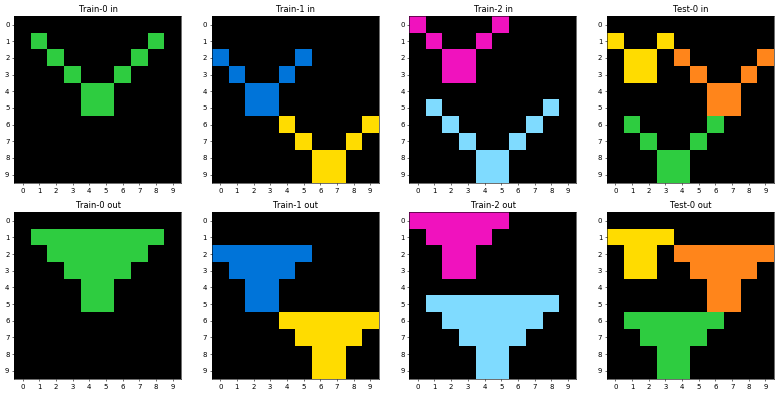

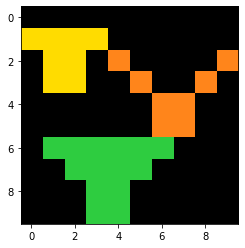

49 0


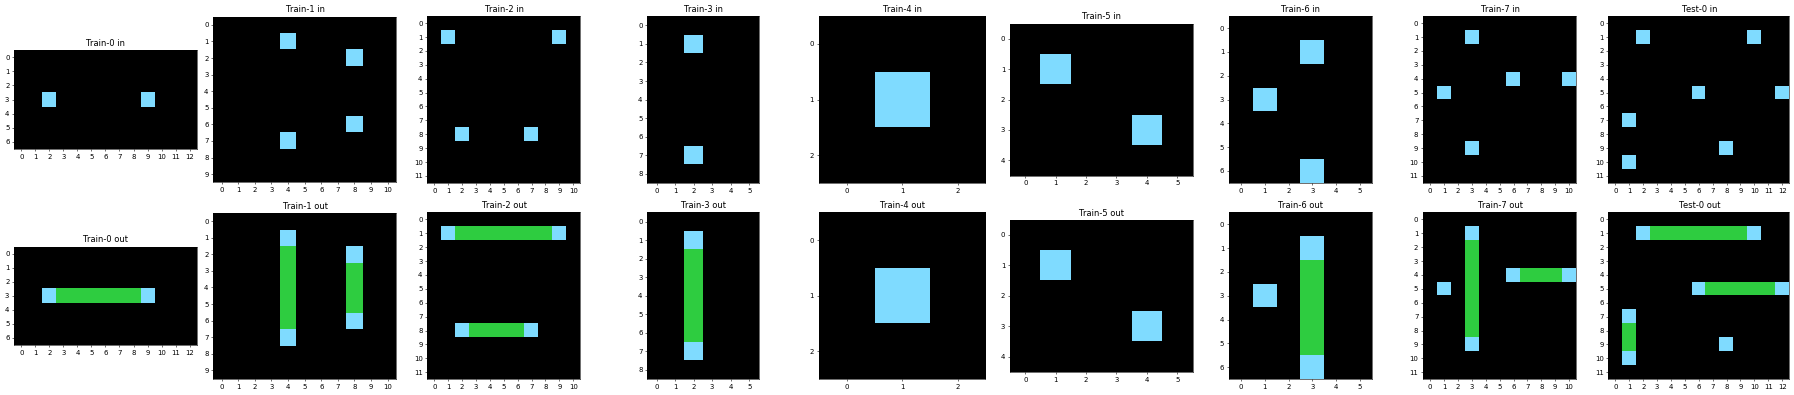

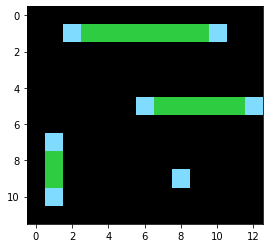

349 0


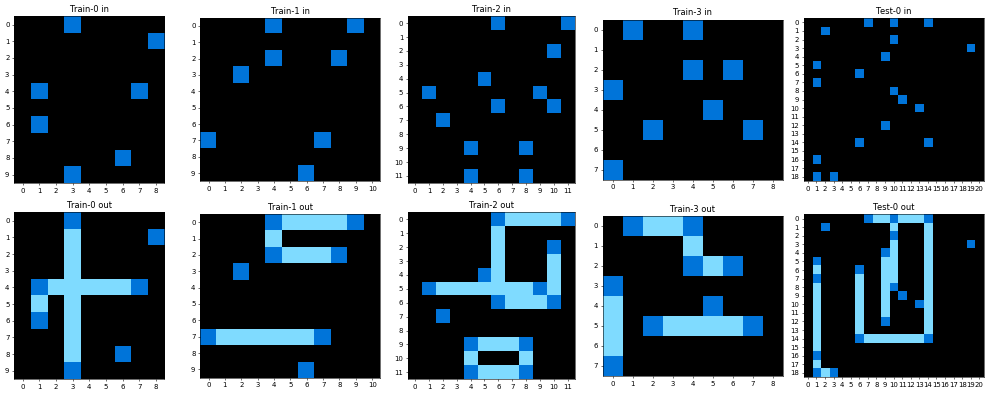

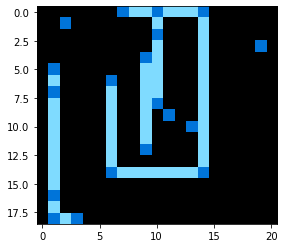

355 0


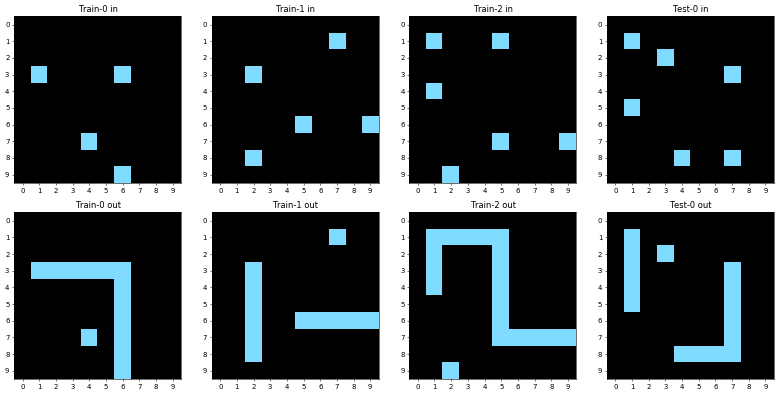

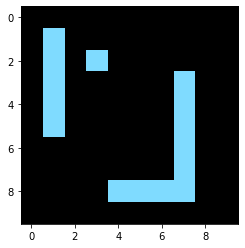

In [126]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])
    
    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_connect_color(basic_task)
        if a!=-1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            plot_picture(a)

In [128]:
def color_classes(a):
    b = len(np.nonzero(np.unique(a))[0])
    return b
#黑色以外的顏色種類數

def one_color_different(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    one_color_di=True
    color=0
    same_color=True
    for x, y in zip(Input,Output):
        if color_classes(x)!=1:
            one_color_di=False
            break
        
        if 0 in np.unique(x):
            x_color=np.unique(x)[1]
        else:
            x_color=np.unique(x)[0]
#         print(x_color)
        if color!=0 and x_color!=color:
            
            same_color=False
            break
        else:
            color=x_color

    if one_color_di==True and same_color==False:
        return True
    else:
        return False

In [136]:
def solve_connect_color_di(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    total_dict={}
    if one_color_different(basic_task)==False:
        return -1
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1


        if 0 in np.unique(x):
            x_color=np.unique(x)[1]
        else:
            x_color=np.unique(x)[0]
        
        x_array=np.array(x)
        y_array=np.array(y)
        x_array[x_array==x_color]=1
        y_array[y_array==x_color]=1
        x=x_array.tolist()
        y=y_array.tolist()
    for x, y in zip(Input,Output):
        if len(x)!=len(y) or len(x[0])!=len(y[0]):
            return -1
        if connect_dot_row_color(x,y)==-1:
            return -1
        pred_y,dict1=connect_dot_row_color(x,y)
        total_dict=dict(total_dict,**dict1)
        
#         if pred_y!=y:
#             return -1
    
    for x, y in zip(Input,Output):
        pred=connect_dot_row_color_use_dict(x,total_dict)

        if pred!=y:
            return -1
    if 0 in np.unique(Test_Case):
        Test_color=np.unique(Test_Case)[1]
    else:
        Test_color=np.unique(Test_Case)[0]
    Test_Case_array=np.array(Test_Case)
    Test_Case_array[Test_Case_array==Test_color]=1
    Test_Case=Test_Case_array.tolist()
    res=connect_dot_row_color_use_dict(Test_Case,total_dict)
    res_array=np.array(res)
    res_array[res_array==1]=Test_color
    res=res_array.tolist()   
    if res==Test_Case:
        return -1
            
    return res

255 0


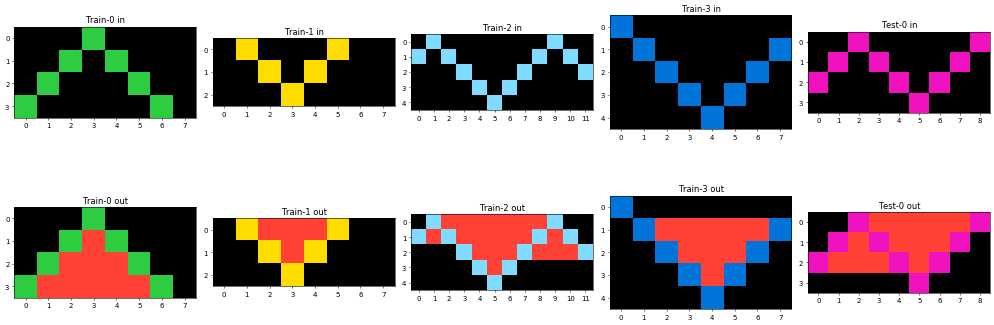

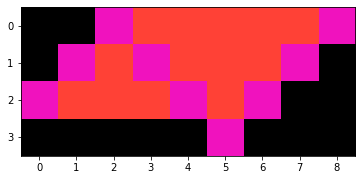

In [137]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])
    
    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_connect_color_di(basic_task)
        if a!=-1:
            print(i,j)
            solved_id.add(i)
            plot_task(task)
            plot_picture(a)

In [80]:
BACKGROUND=0
def connect_dot_row(a0):
    a=np.array(a0)
    a_copy=a.copy()
    m,n=a.shape
    for i in range(m):
        for j in range(n):
            if a[i][j]==BACKGROUND:
                continue
            else:
                c=a[i][j]
            if j+1<=n-1:
                for k in range(j+1,n):
                    if a[i][k]==c:
                        
                        for p in range(j+1,k):
                            if a_copy[i,p]==BACKGROUND:
                                a_copy[i,p]=c
                        
                        
            if i+1<=m-1:
                for l in range(i+1,m):
                    if a[l][j]==c:
                        #a_copy[i+1:l,j]=c
                        for q in range(i+1,l):
                            if a_copy[q,j]==BACKGROUND:
                                a_copy[q,j]=c
                            
                       
                    
    return a_copy.tolist()

In [73]:
a=Trains[40]["train"][0]["input"]
connect_dot_row(a)


[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 3, 3, 3, 3, 3, 3, 3, 3, 0],
 [0, 0, 3, 3, 3, 3, 3, 3, 0, 0],
 [0, 0, 0, 3, 3, 3, 3, 0, 0, 0],
 [0, 0, 0, 0, 3, 3, 0, 0, 0, 0],
 [0, 0, 0, 0, 3, 3, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [74]:
def solve_connect(basic_task):
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    
    for x, y in zip(Input,Output):
        pred_y=connect_dot_row(x)
        if pred_y!=y:
            return -1
    return connect_dot_row(Test_Case)
        

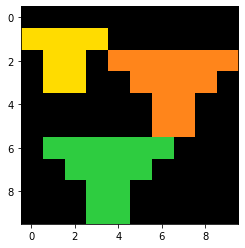

In [81]:
task=Trains[40]
basic_task = Create(task, 0)
if solve_connect(basic_task)!=-1:
    plot_picture(solve_connect(basic_task))

In [28]:
#Trains[49] not completed

7 0


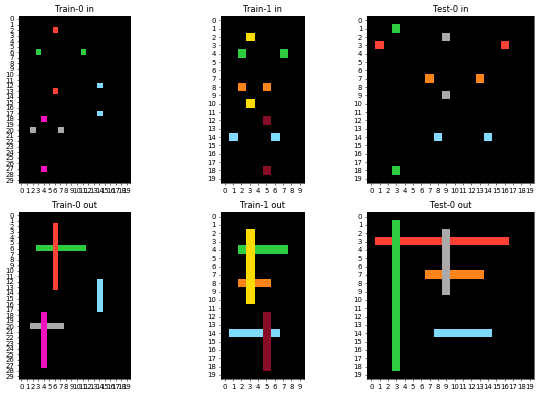

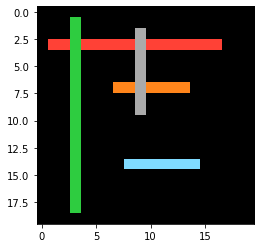

In [82]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=solve_connect(basic_task)
        if a!=-1:
            print(i,j)
            solved_eva_id.add(i)
            plot_task(task)
            plot_picture(a)

In [22]:
list(solved_id)

[349]

In [23]:
list(solved_eva_id)

[7]